<h1>CUSTOMER ANALYSIS - MARKETING DATA</h1>

<h3>The objective of this proyect is to understand customer demographics and buying behavior. We will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth.</h3>

-------------------

<h2>IMPORTING THE NECESSARY LIBRARIES<h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<h2>IGNORING THE PANDAS WARNINGS</h2>

In [2]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action = "ignore", category = SettingWithCopyWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 

<h2>IMPORTING THE DATA</h2>

In [3]:
def importing_data(path):
    data = pd.read_csv(path)
    return data

data_path = 'data/marketing_customer_analysis.csv'
mkt_customer_data = importing_data(data_path)

<h2>NORMAILIZING COLUMN NAMES</h2>

In [4]:
def normalizing_columns(dataframe):

    normalized_columns = list()

    for column in dataframe.columns:
        column = column.replace(' ', '_')
        normalized_columns.append(column.lower())

    dataframe.columns = normalized_columns

    return dataframe

mkt_customer_data = normalizing_columns(mkt_customer_data)

<h2>ELIMINATING COLUMNS WITH MORE THAN 25% OF NAN VALUES</h2>

In [5]:
def dropping_nan_columns(dataframe):

    for column in dataframe.columns:

        column_nan_values = dataframe[column].isna().sum()

        if column_nan_values / len(dataframe) >= 0.25:
            dataframe = dataframe.drop(columns = [column])

    return dataframe

mkt_customer_data = dropping_nan_columns(mkt_customer_data)

<h2>DEALING WITH THE "EFFECTIVE TO DATE" COLUMN</h2>

In [6]:
def datetime_data_extracting(dataframe, date_column):

    dataframe[date_column] = pd.to_datetime(dataframe[date_column])

    dataframe['year'] = dataframe[date_column].dt.year
    dataframe['month'] = dataframe[date_column].dt.month
    dataframe['day'] = dataframe[date_column].dt.day

    dataframe = dataframe.drop(columns = [date_column])

    return dataframe

mkt_customer_data = datetime_data_extracting(mkt_customer_data, 'effective_to_date')

<h2>SEPARATING CATEGORICAL DATA FROM NUMERICAL DATA</h2>

In [7]:
def separating_numerical_categorical(dataframe):

    numerical_data = dataframe.select_dtypes(include = np.number)
    categorical_data = dataframe.select_dtypes(include = object).drop(columns = ['customer'])

    return numerical_data, categorical_data

mkt_customer_num_data, mkt_customer_cat_data = separating_numerical_categorical(mkt_customer_data)

<h2>FILLING NAN VALUES FROM NUMERICAL COLUMNS WITH THE MEAN</h2>

In [8]:
def filling_numerical_nan(numerical_dataframe):

    for column in numerical_dataframe.columns:

        column_nan_values = numerical_dataframe[column].isna().sum()

        if column_nan_values > 0:
            column_mean = numerical_dataframe[column].mean()
            numerical_dataframe[column] = numerical_dataframe[column].fillna(column_mean)

    return numerical_dataframe

mkt_customer_num_data = filling_numerical_nan(mkt_customer_num_data)

<h2>FILLING NAN VALUES FROM CATEGORICAL COLUMNS WITH THE MODE</h2>

In [9]:
def filling_categorical_nan(categorical_dataframe):

    for column in categorical_dataframe.columns:

        column_nan_values = categorical_dataframe[column].isna().sum()

        if column_nan_values > 0:
            column_mode = categorical_dataframe[column][0]
            categorical_dataframe[column] = categorical_dataframe[column].fillna(column_mode)

    return categorical_dataframe

mkt_customer_cat_data = filling_categorical_nan(mkt_customer_cat_data)

<h2>DATA EXPLORATION - CATEGORICAL DATA</h2>

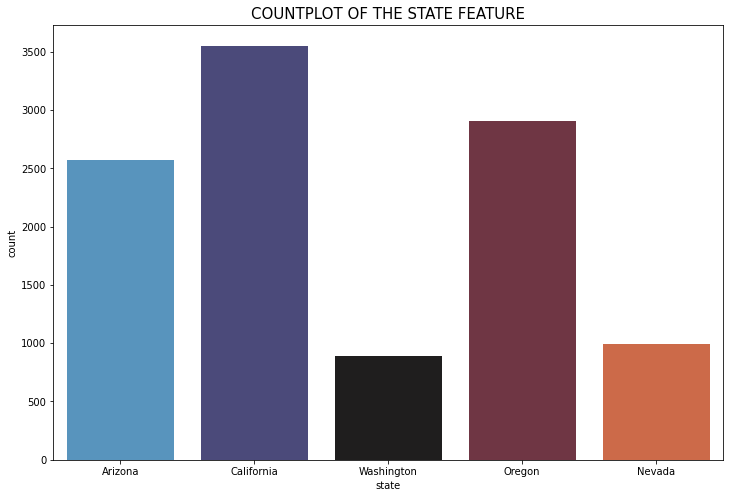

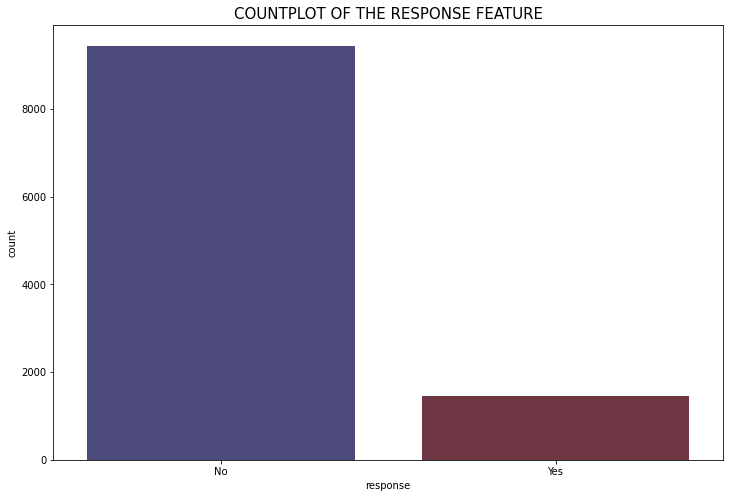

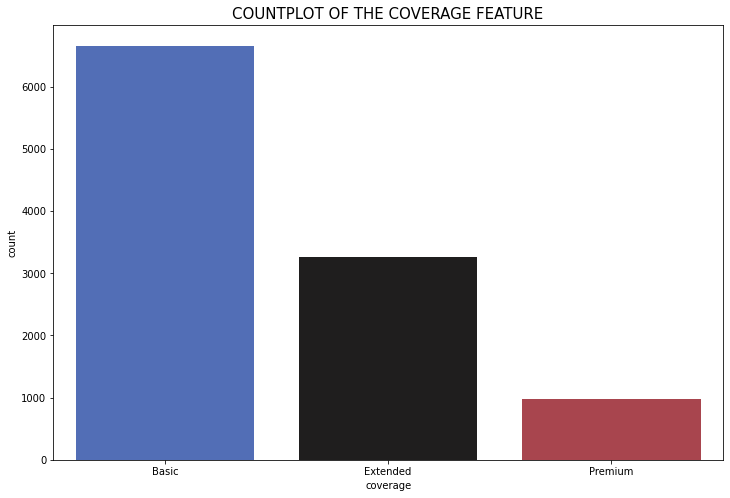

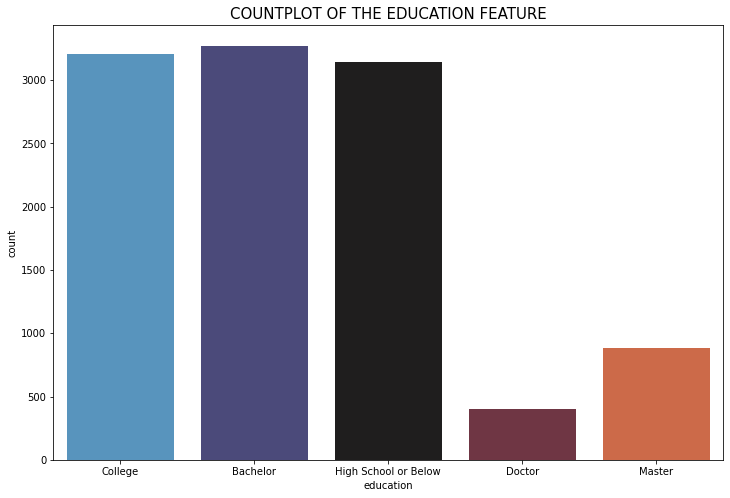

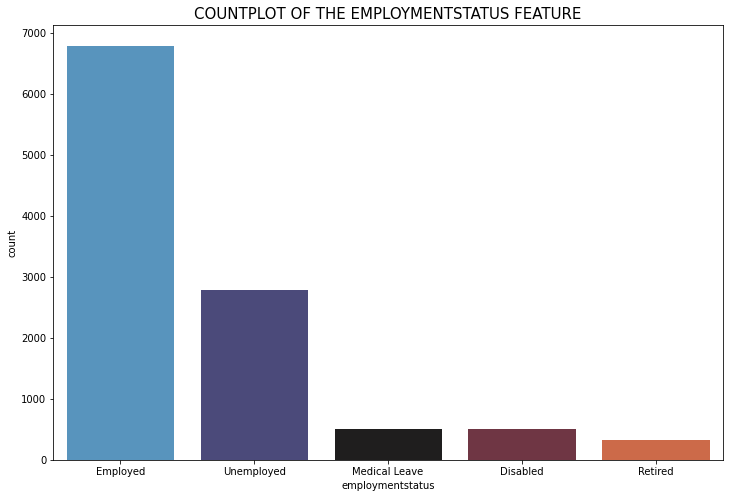

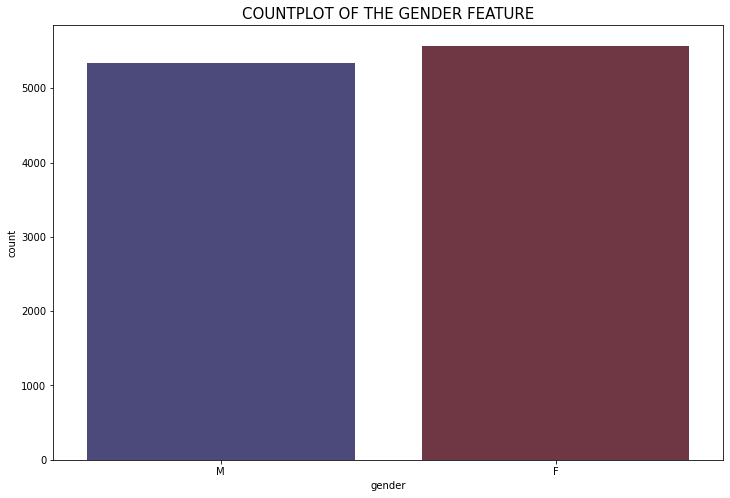

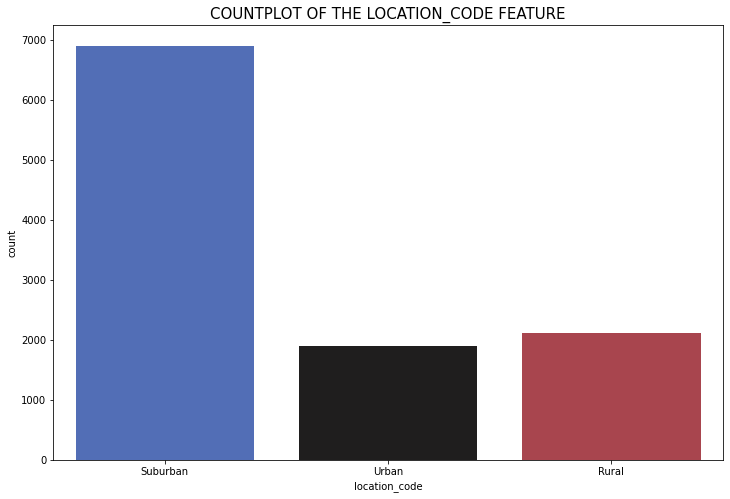

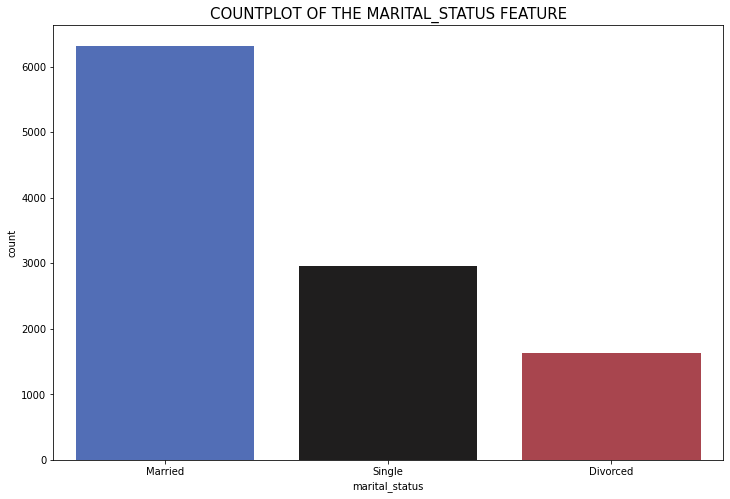

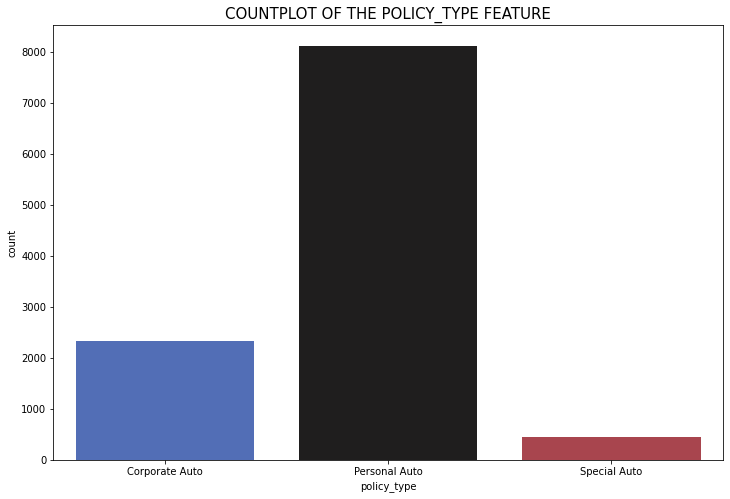

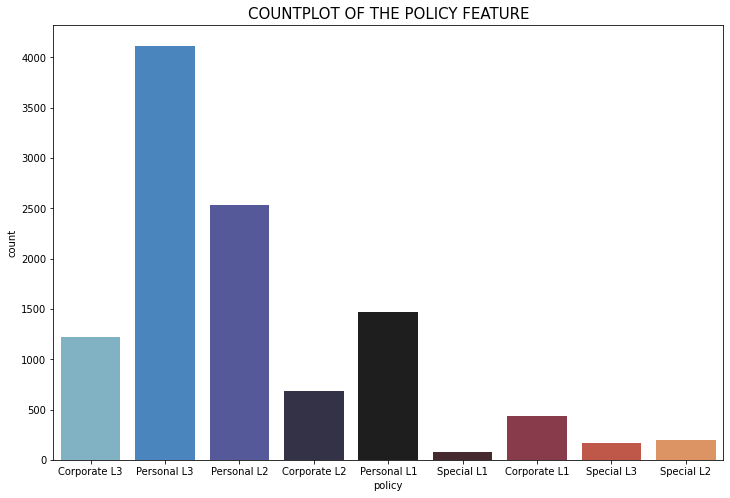

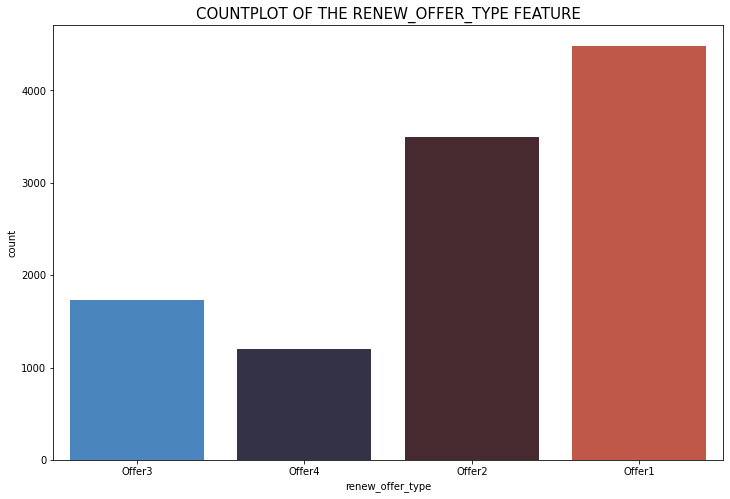

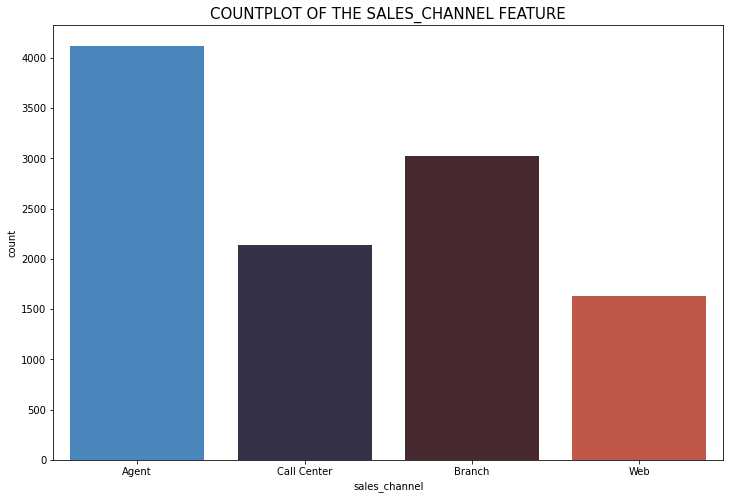

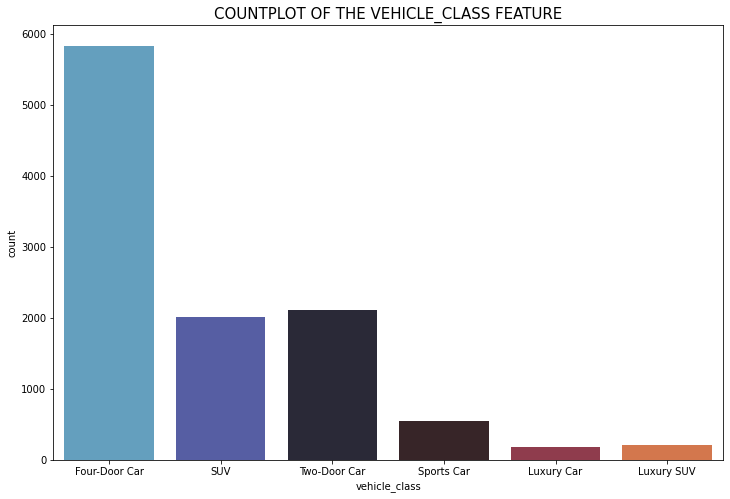

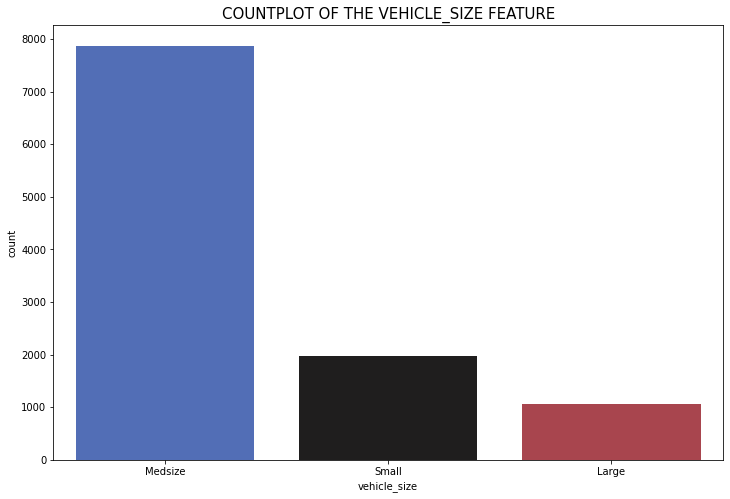

In [10]:
def categorical_exploration_data(categorical_dataframe, column):

    fig = plt.figure(figsize = (12, 8))
    sns.countplot(x = column, data = categorical_dataframe, palette = 'icefire')
    plt.title(f'COUNTPLOT OF THE {column.upper()} FEATURE', fontsize = 15)

    return plt.show()

for column in mkt_customer_cat_data.columns:
    categorical_exploration_data(mkt_customer_cat_data, column)

<h2>DATA EXPLORATION - NUMERICAL DATA (AVOIDING DATETIME COLUMNS)</h2>

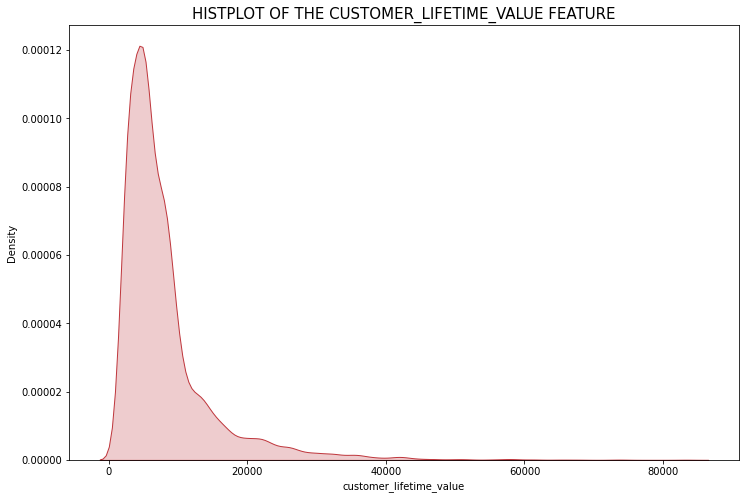

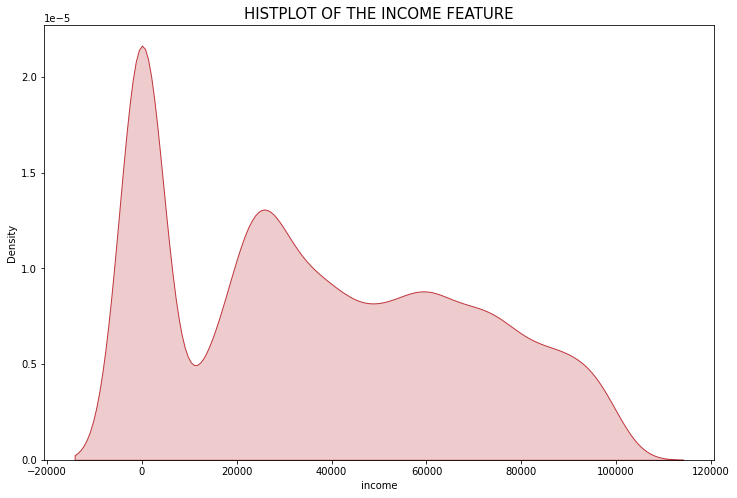

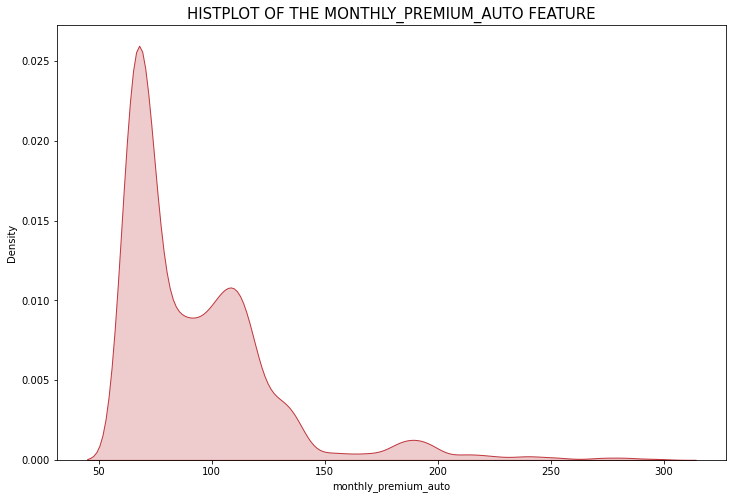

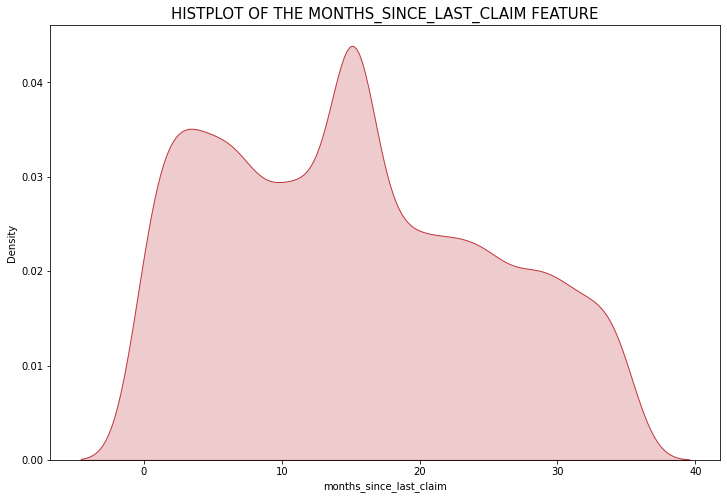

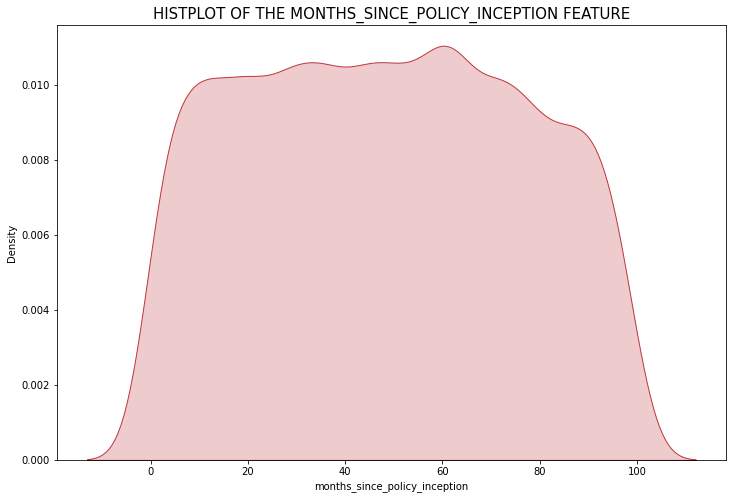

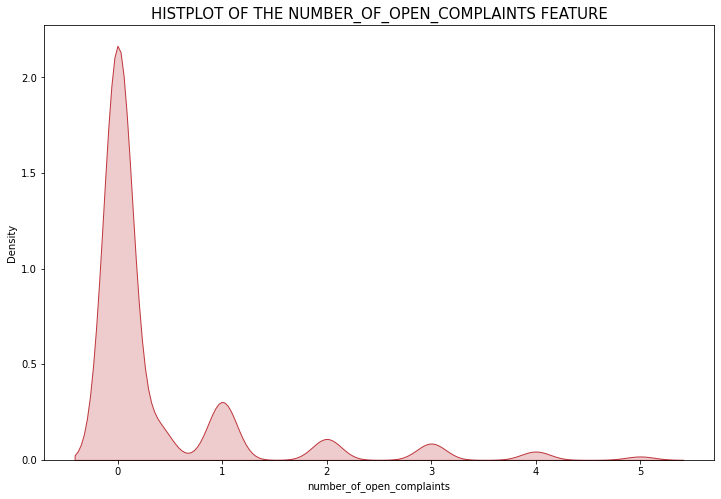

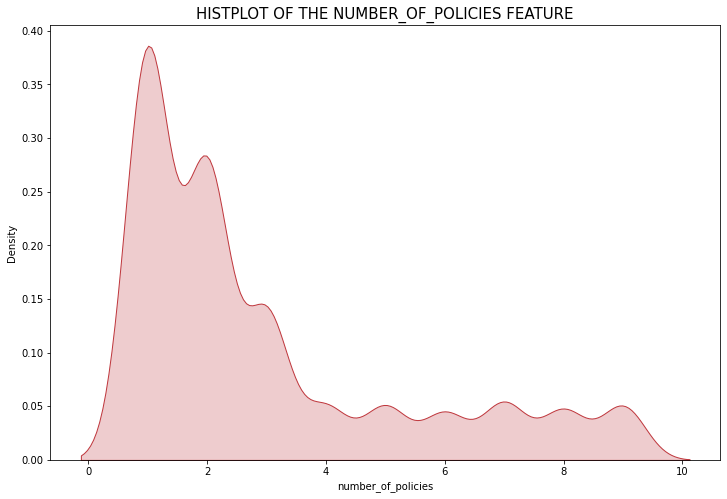

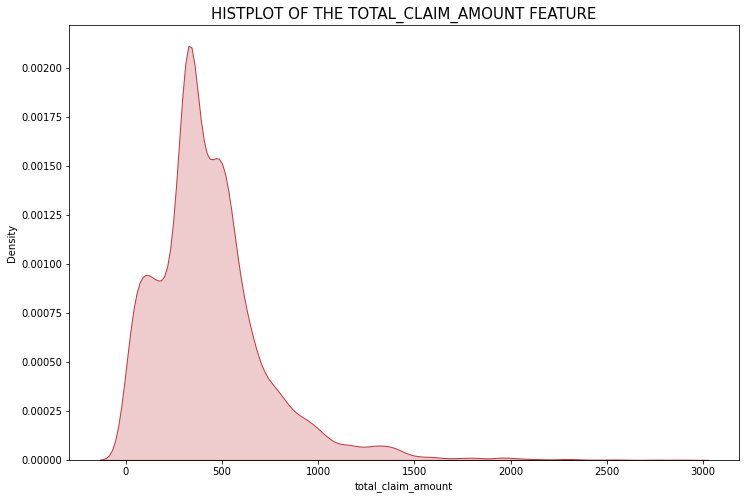

In [11]:
def numerical_exploration_data(numerical_dataframe, column):

    fig = plt.figure(figsize = (12, 8))
    sns.kdeplot(x = column, data = numerical_dataframe, color = '#BF373D', fill = True)
    plt.title(f'HISTPLOT OF THE {column.upper()} FEATURE', fontsize = 15)

    return plt.show()

columns_to_avoid = ['day', 'month', 'year']

for column in mkt_customer_num_data.columns:
    if column not in columns_to_avoid:
        numerical_exploration_data(mkt_customer_num_data, column)

<h2>DEEPER ANALYSIS - RESPONSE, SALES CHANNEL AND TOTAL CLAIM AMOUNT</h2>

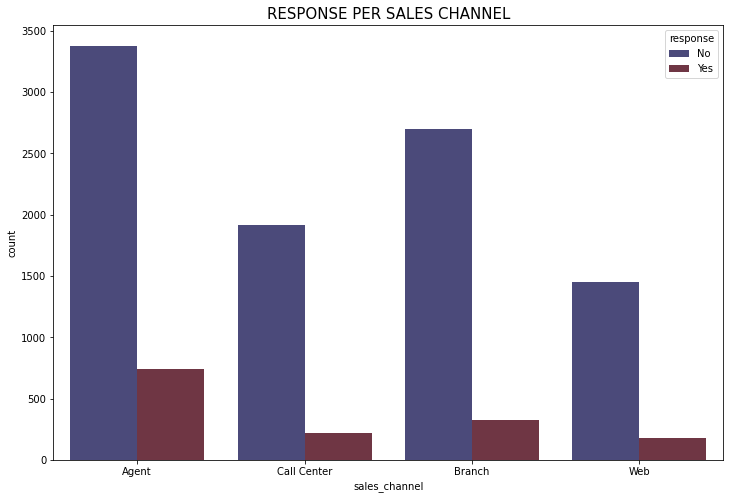

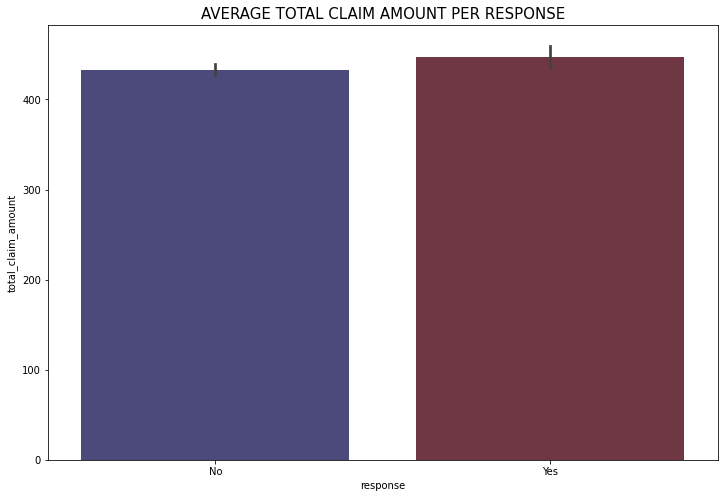

In [12]:
def response_per_sales_channel(numerical_dataframe, categorical_dataframe, sales_channel, response):

    dataframe = pd.concat([numerical_dataframe, categorical_dataframe], axis = 1)

    fig = plt.figure(figsize = (12, 8))
    sns.countplot(x = sales_channel, hue = response, data = dataframe, palette = 'icefire')
    plt.title(f'RESPONSE PER SALES CHANNEL', fontsize = 15)

    return plt.show()

def claim_amount_per_response(numerical_dataframe, categorical_dataframe, claim_amount, response):

    dataframe = pd.concat([numerical_dataframe, categorical_dataframe], axis = 1)

    fig = plt.figure(figsize = (12, 8))
    sns.barplot(x = response, y = claim_amount, data = dataframe, palette = 'icefire')
    plt.title(f'AVERAGE TOTAL CLAIM AMOUNT PER RESPONSE', fontsize = 15)

    return plt.show()

response_per_sales_channel(mkt_customer_num_data, mkt_customer_cat_data, 'sales_channel', 'response')
claim_amount_per_response(mkt_customer_num_data, mkt_customer_cat_data, 'total_claim_amount', 'response')

<h2>CORRELATION MAP OF THE NUMERICAL FEATURES</h2>

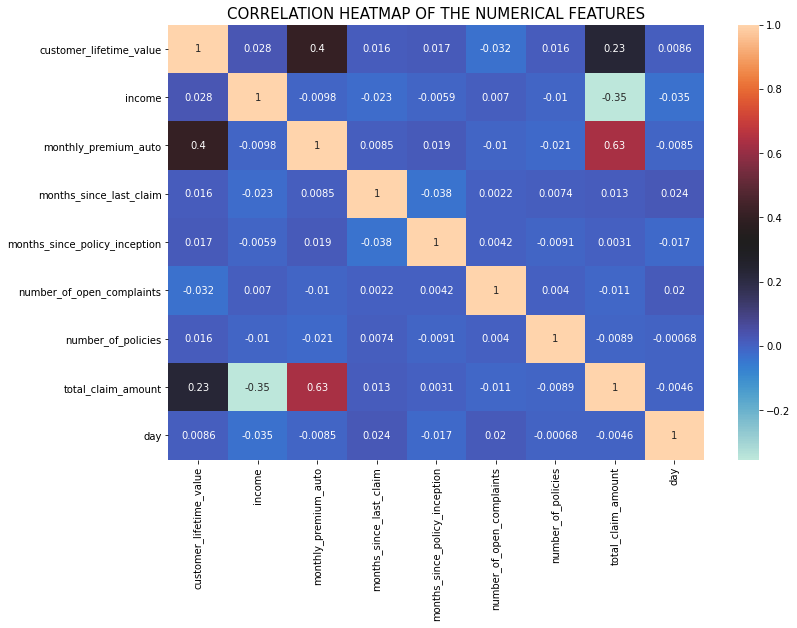

In [13]:
def correlation_map(numerical_dataframe, columns_to_avoid):

    numerical_dataframe = numerical_dataframe.drop(columns = columns_to_avoid)

    fig = plt.figure(figsize = (12, 8))
    sns.heatmap(numerical_dataframe.corr(), annot = True, cmap = 'icefire')
    plt.title('CORRELATION HEATMAP OF THE NUMERICAL FEATURES', fontsize = 15)

    return plt.show()

correlation_map(mkt_customer_num_data, ['year', 'month'])

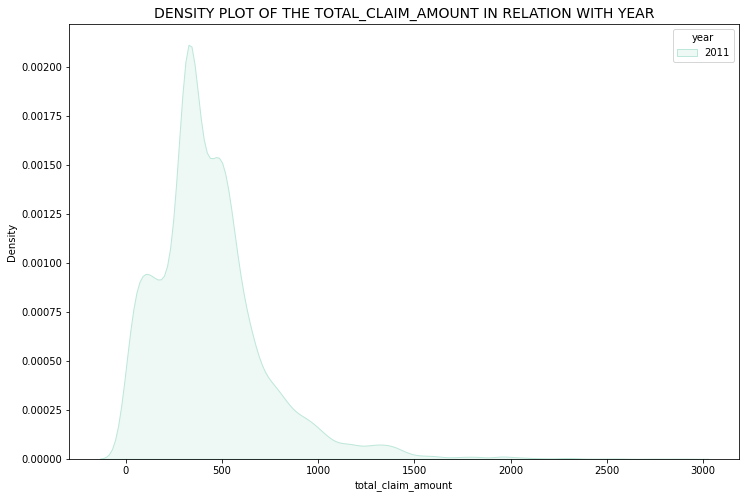

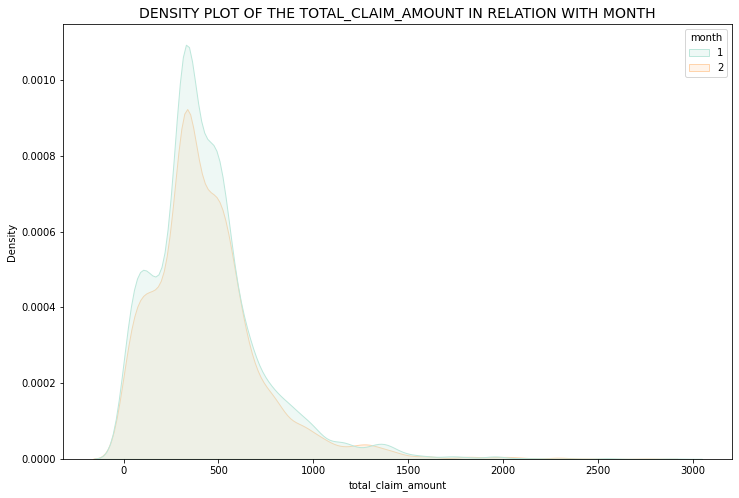

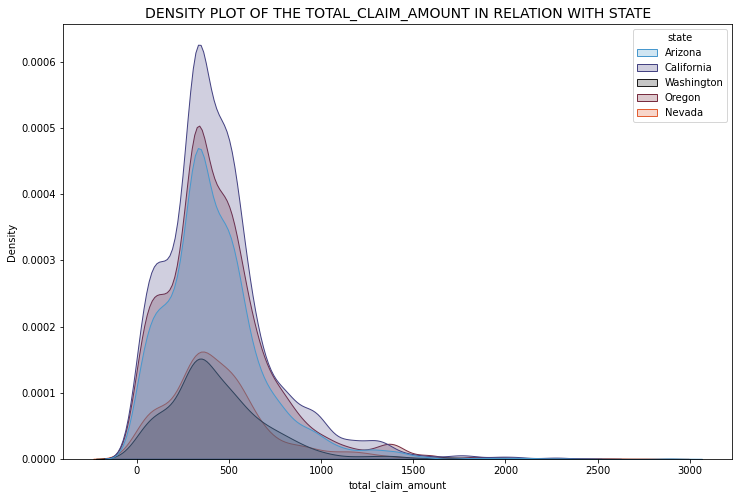

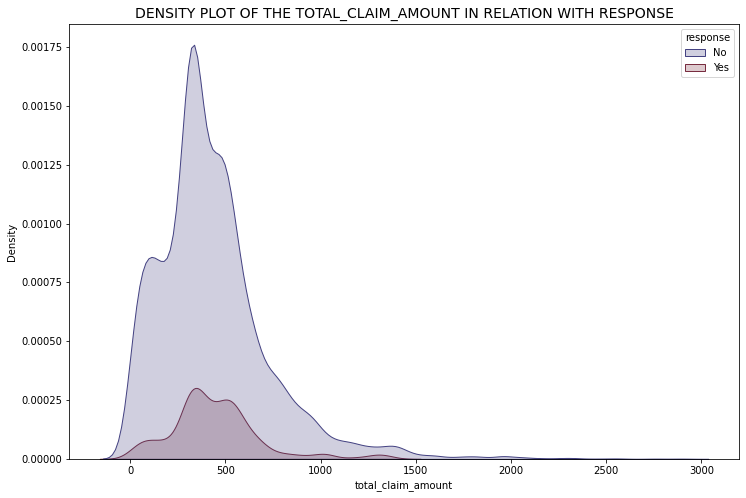

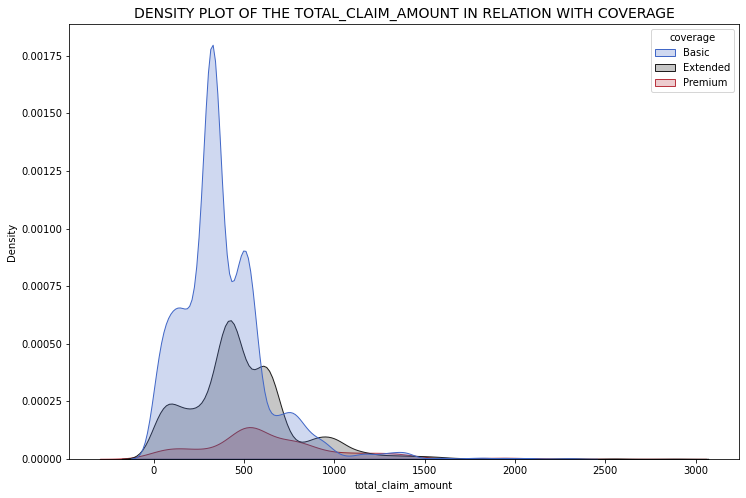

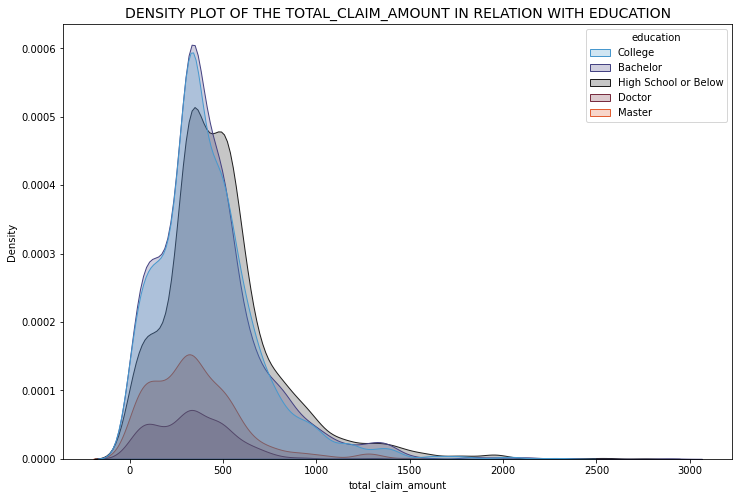

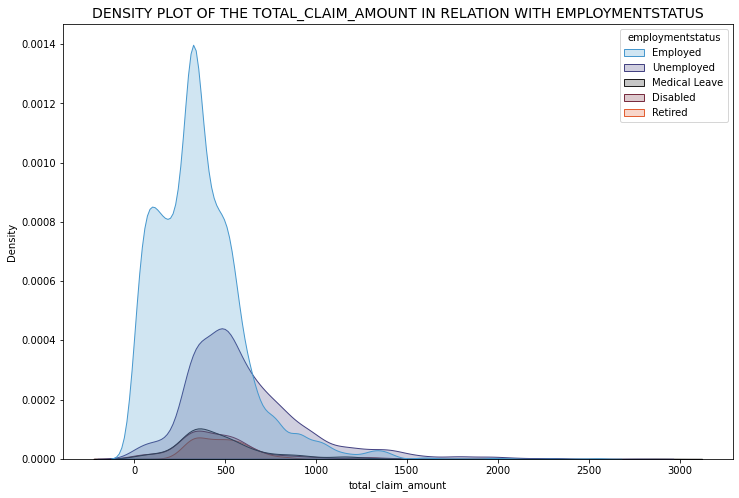

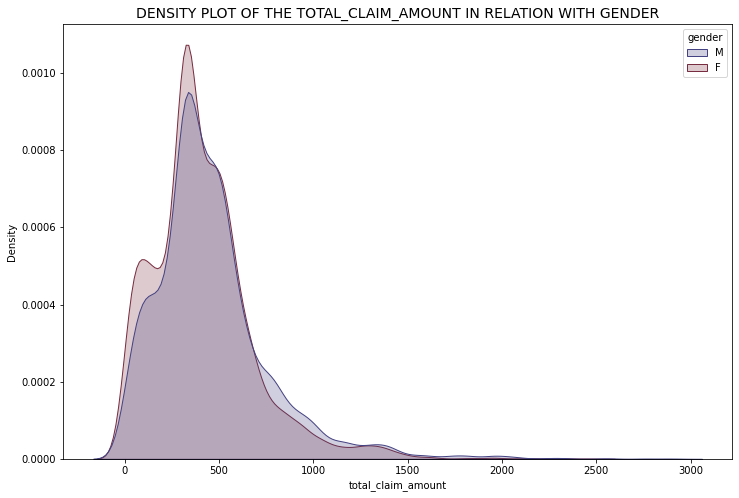

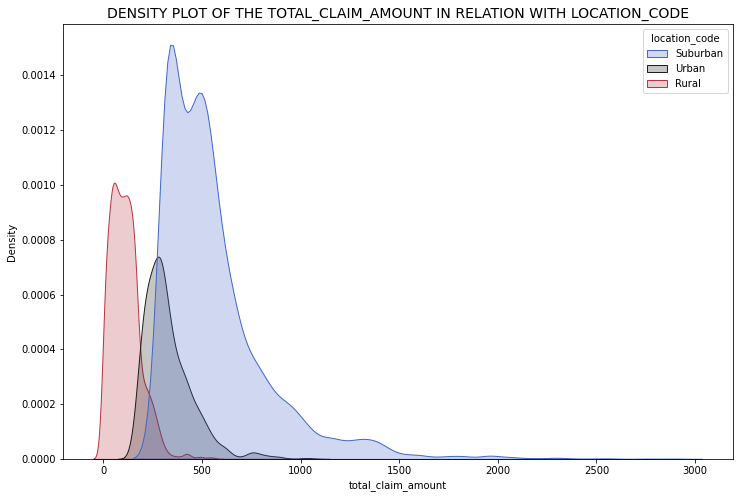

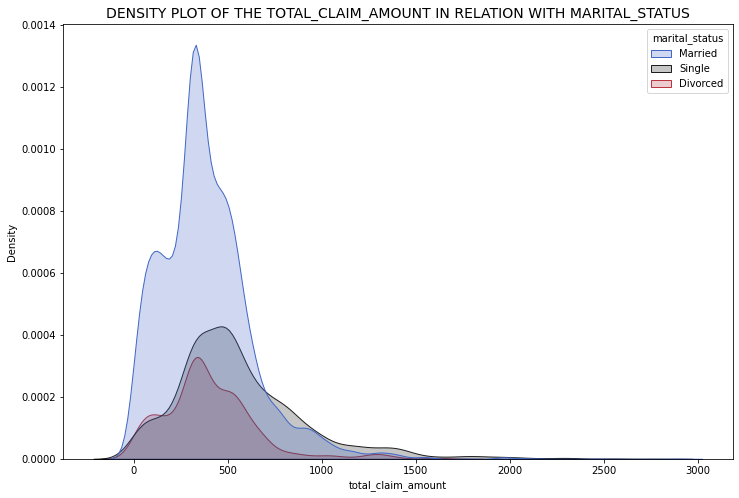

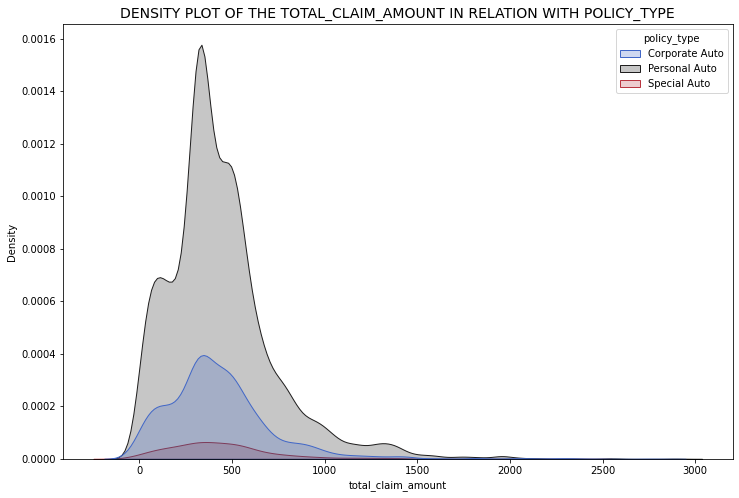

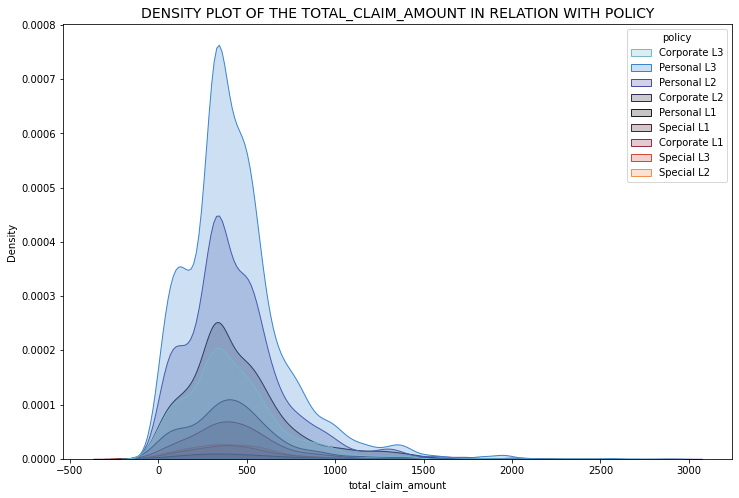

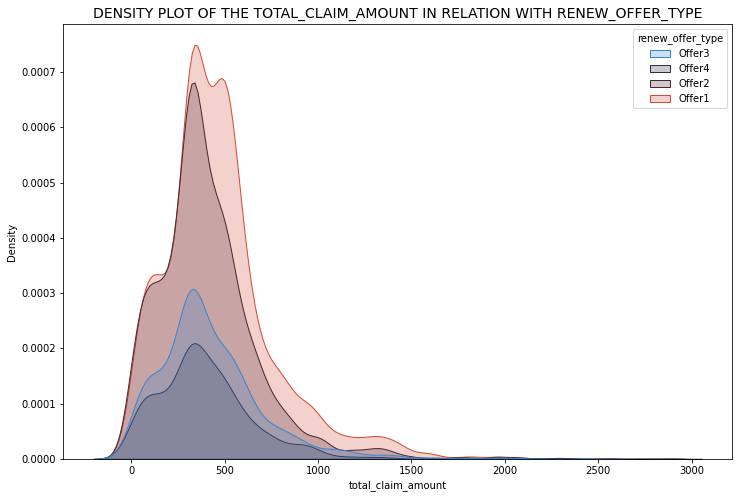

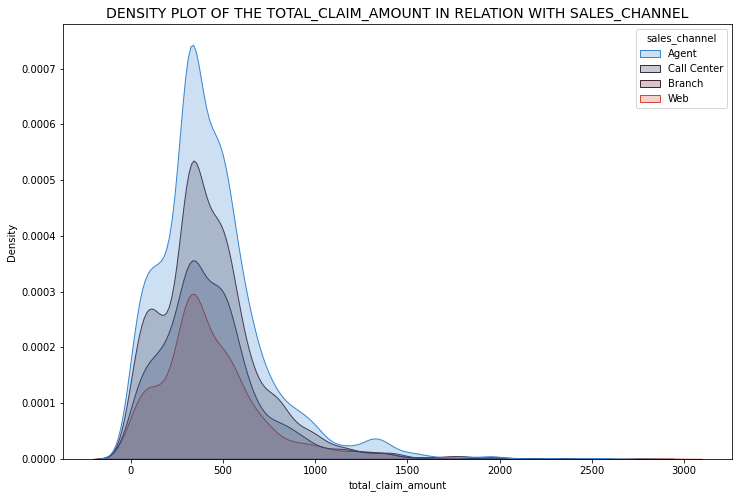

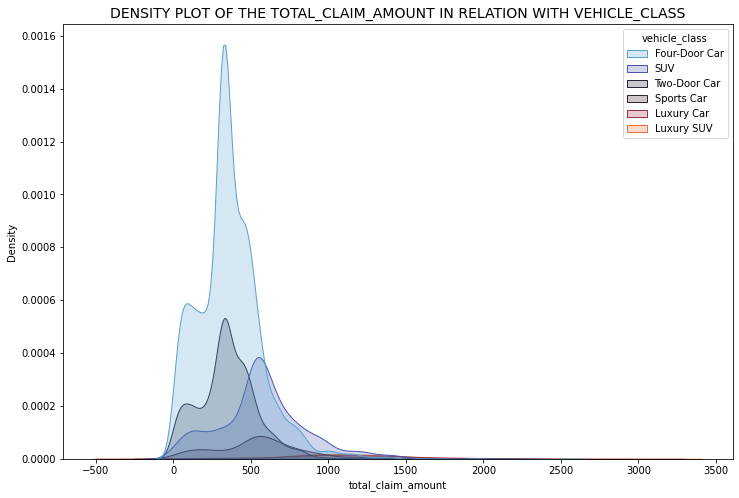

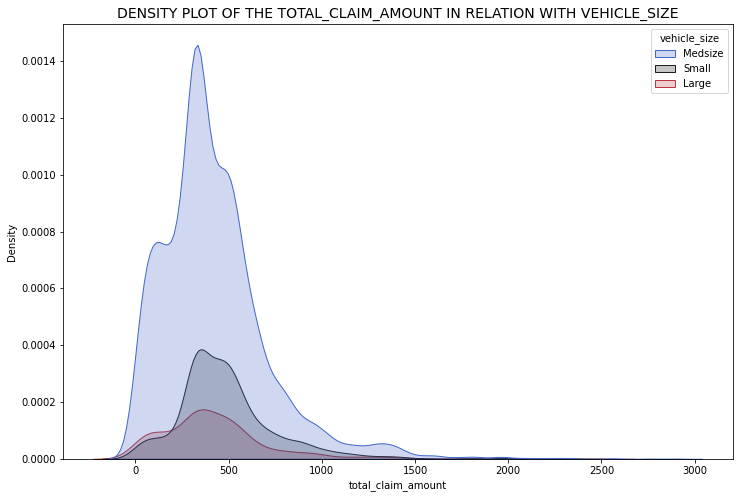

In [14]:
def categorical_per_target(numerical_dataframe, categorical_dataframe, to_categorical_columns, target):

    dataframe = pd.concat([numerical_dataframe, categorical_dataframe], axis = 1)
    dataframe[to_categorical_columns] = dataframe[to_categorical_columns].astype('object')
    categorical_columns = dataframe.select_dtypes(include = object)

    for column in categorical_columns:
        
        fig = plt.figure(figsize = (12, 8))
        sns.kdeplot(x = target, hue = column, data = dataframe, fill = True, palette = 'icefire')
        plt.title(f'DENSITY PLOT OF THE {target.upper()} IN RELATION WITH {column.upper()}', fontsize = 14)
        plt.show()

    return None

categorical_per_target(mkt_customer_num_data, mkt_customer_cat_data, ['month', 'year'], 'total_claim_amount')    

<h2>TRANSFORMING SKEWED COLUMNS INTO NORMAL DISTRIBUTIONS EXCEPT THE TARGET</h2>

In [15]:
def log_transfom_numerical_data(number):
    
    number = np.log10(number)

    if np.isfinite(number):
        return number

    else:
        return np.NAN

skewed_columns = ['number_of_policies', 'number_of_open_complaints', 
                  'monthly_premium_auto', 'income',
                  'customer_lifetime_value']

for column in skewed_columns:
    
    mkt_customer_num_data[column] = list(map(log_transfom_numerical_data, mkt_customer_num_data[column]))
    column_mean = np.mean(mkt_customer_num_data[column])
    mkt_customer_num_data[column] = mkt_customer_num_data[column].fillna(column_mean)

<h2>CONCATING THE NUMERICAL AND THE CATEGORICAL DATA</h2>

In [16]:
def concating_numerical_categorical(numerical_dataframe, categorical_dataframe):
    dataframe = pd.concat([numerical_dataframe, categorical_dataframe], axis = 1)
    return dataframe

mkt_customer_data = concating_numerical_categorical(mkt_customer_num_data, mkt_customer_cat_data)

<h2>PERFORMING THE TRAIN TEST SPLIT</h2>

In [17]:
def split_train_test(dataframe, target):

    X = dataframe.drop(columns = [target])
    y = dataframe[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(mkt_customer_data, 'total_claim_amount')

<h2>NORMALIZING ALL THE NUMERICAL DATA USING THE STANDARD SCALER</h2>

In [18]:
def normalizing_numerical_data(training_data, testing_data, to_avoid_columns):

    numerical_columns = training_data.select_dtypes(include = np.number).drop(columns = to_avoid_columns).columns

    standard_scaler = StandardScaler().fit(training_data[numerical_columns])

    training_data[numerical_columns] = standard_scaler.transform(training_data[numerical_columns])
    testing_data[numerical_columns] = standard_scaler.transform(testing_data[numerical_columns])

    return training_data, testing_data

X_train, X_test = normalizing_numerical_data(X_train, X_test, ['month', 'year'])

<h2>CONVERTING THE MONTH AND THE YEAR COLUMNS IN CATEGORICAL DATA</h2>

In [19]:
def month_year_categorical(training_data, testing_data, month, year):

    training_data[month] = training_data[month].astype('object')
    testing_data[month] = testing_data[month].astype('object')

    training_data[year] = training_data[year].astype('object')
    testing_data[year] = testing_data[year].astype('object')

    return training_data, testing_data

X_train, X_test = month_year_categorical(X_train, X_test, 'month', 'year')

<h2>ENCODING THE CATEGORICAL DATA USING ONE HOT ENCODER</h2>

In [20]:
def encoding_categorical_data(training_data, testing_data):

    training_data_numerical = training_data.select_dtypes(include = np.number)
    training_data_categorical = training_data.select_dtypes(include = object)

    testing_data_numerical = testing_data.select_dtypes(include = np.number)
    testing_data_categorical = testing_data.select_dtypes(include = object)

    one_hot_encoder = OneHotEncoder().fit(training_data_categorical)

    training_data_categorical_array = one_hot_encoder.transform(training_data_categorical).toarray()
    testing_data_categorical_array = one_hot_encoder.transform(testing_data_categorical).toarray()

    listed_columns = list()
    to_drop_columns = list()

    for columns in one_hot_encoder.categories_:
        to_drop_columns.append(columns[0])
        for column in columns.tolist():
            listed_columns.append(column)

    training_data_categorical = pd.DataFrame(data = training_data_categorical_array, columns = listed_columns)
    training_data_categorical = training_data_categorical.set_index(training_data_numerical.index)
    training_data_categorical = training_data_categorical.drop(columns = to_drop_columns)

    testing_data_categorical = pd.DataFrame(data = testing_data_categorical_array, columns = listed_columns)
    testing_data_categorical = testing_data_categorical.set_index(testing_data_numerical.index)
    testing_data_categorical = testing_data_categorical.drop(columns = to_drop_columns)

    training_data = pd.concat([training_data_numerical, training_data_categorical], axis = 1)
    testing_data = pd.concat([testing_data_numerical, testing_data_categorical], axis = 1)

    return training_data, testing_data

X_train, X_test = encoding_categorical_data(X_train, X_test)

<h2>CREATING AND TRAINING A LINEAR REGRESSION MODEL</h2>

In [21]:
def linear_regression_model(training_x, training_y):

    model = LinearRegression()
    model.fit(training_x, training_y)

    return model

linear_regression = linear_regression_model(X_train, y_train)

<h2>GETTING THE PERFORMANCE METRICS OF THE MODEL</h2>

In [22]:
def model_metrics(model, testing_x, testing_y):

    predictions = model.predict(testing_x)

    score = model.score(testing_x, testing_y)
    r2 = r2_score(predictions, testing_y)
    mse = mean_squared_error(predictions, testing_y)
    mae = mean_absolute_error(predictions, testing_y)
    rmse = sqrt(mse)

    return score, r2, mse, mae, rmse

score, r2, mse, mae, rmse = model_metrics(linear_regression, X_test, y_test)

<h2>MODEL RESULTS</h2>

In [23]:
print('\nRESULTS AND METRICS OF THE MODEL')
print('--------------------------------\n')

print(f'SCORE: {round(score, 2)}')
print(f'R2 SCORE: {round(r2, 2)}')
print(f'MEAN SQUARED ERROR: {round(mse, 2)}')
print(f'MEAN ABSOLUTE ERROR: {round(mae, 2)}')
print(f'ROOT MEAN SQUARED ERROR: {round(rmse, 2)}')


RESULTS AND METRICS OF THE MODEL
--------------------------------

SCORE: 0.77
R2 SCORE: 0.74
MEAN SQUARED ERROR: 17870.33
MEAN ABSOLUTE ERROR: 95.46
ROOT MEAN SQUARED ERROR: 133.68


<h2>SELECTING ONLY 20 FEATURES WITH A SEQUENTIAL (FORWARD) SELECTOR</h2>

In [24]:
def sequential_feature_selection(training_x, training_y, testing_x):

    feature_selection = SequentialFeatureSelector(LinearRegression(), n_features_to_select = 20,
                                                  direction = 'forward').fit(training_x, training_y)
    
    all_features = training_x.columns
    selected_features = all_features[feature_selection.get_support()]

    training_x = training_x[selected_features]
    testing_x = testing_x[selected_features]

    return training_x, testing_x

X_train_reduced, X_test_reduced = sequential_feature_selection(X_train, y_train, X_test)

<h2>MODEL RESULTS WITH ONLY 20 FEATURES</h2>

In [25]:
linear_regression_reduced = linear_regression_model(X_train_reduced, y_train)
score_r, r2_r, mse_r, mae_r, rmse_r = model_metrics(linear_regression_reduced, X_test_reduced, y_test)

print('\nRESULTS AND METRICS OF THE MODEL WITH ONLY 20 FEATURES')
print('------------------------------------------------------\n')

print(f'SCORE: {round(score_r, 2)}')
print(f'R2 SCORE: {round(r2_r, 2)}')
print(f'MEAN SQUARED ERROR: {round(mse_r, 2)}')
print(f'MEAN ABSOLUTE ERROR: {round(mae_r, 2)}')
print(f'ROOT MEAN SQUARED ERROR: {round(rmse_r, 2)}')


RESULTS AND METRICS OF THE MODEL WITH ONLY 20 FEATURES
------------------------------------------------------

SCORE: 0.77
R2 SCORE: 0.74
MEAN SQUARED ERROR: 17808.99
MEAN ABSOLUTE ERROR: 95.59
ROOT MEAN SQUARED ERROR: 133.45
